# Skillbox — Мастер-класс: Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

# Новый раздел

# 4. Домашнее задание
***

In [1]:
import numpy as np
import pandas as pd
import math
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
palette = plt.get_cmap('Set2')

In [2]:
df_kiva_loans = pd.read_csv('kiva_loans.csv')
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")
df_kiva_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


## 4.1. Самостоятельная работа
***

- А в каких странах преобладают мужчины? Группа людей? (п. 2.2.2.)
- Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей? (п. 2.4.2.)
- Попробуйте найти связь между странами (регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных? (п. 2.4.3.)

## 4.2. Домашняя работа
***

Расширьте наш отчёт исследованием следующих вопросов:

- Зависимость пола заёмщика от региона планеты, сектора экономики.
- Влияние такого атрибута займа, как **Количество кредиторов** (lender_count), на суммы и сроки займов.
- Влияние показателя **MPI** (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.
- Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе **макрорегионов**.

# Зависимость пола заёмщика от региона планеты

In [3]:
df_mpi_gouped = df_mpi.groupby(['ISO', 'country', 'world_region'])['MPI'].mean().fillna(0).reset_index()
df_kiva_loans = df_kiva_loans.merge(df_mpi_gouped, how='left', on='country')
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True) > 0.005]
list_countries = list(countries.index)
regions = df_kiva_loans['world_region'].value_counts()
regions_list = regions.index.to_list()
df_kiva_loans['borrower_genders'] = [elem if elem in ['female', 'male'] else 'group' for elem in df_kiva_loans['borrower_genders']]
borrowers = df_kiva_loans['borrower_genders'].value_counts()
df_kiva_loans.head(10)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,group,irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,...,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01,KEN,Sub-Saharan Africa,0.209375
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,...,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,...,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01,PAK,South Asia,0.233167
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,...,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01,PAK,South Asia,0.233167
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,...,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167


In [5]:
countRegionsWithGender = df_kiva_loans[df_kiva_loans['world_region'].isin(regions.index.values)].groupby(['world_region', 'borrower_genders'])['borrower_genders'].count()
countRegionsWithGender

world_region                 borrower_genders
Arab States                  female                3886
                             group                 1402
                             male                  3899
East Asia and the Pacific    female              165868
                             group                28419
                             male                 12662
Europe and Central Asia      female               27470
                             group                  134
                             male                 11223
Latin America and Caribbean  female               71740
                             group                17180
                             male                 44839
South Asia                   female               33341
                             group                 4347
                             male                  1127
Sub-Saharan Africa           female               85275
                             group                35656
  

In [6]:
df_gender_by_region = countRegionsWithGender.groupby(level=0).apply(lambda x: 100*x/x.sum()).unstack('borrower_genders').fillna(0).sort_values(by=['female', 'male'])[-20:]
df_gender_by_region = df_gender_by_region[['female', 'male', 'group']]
df_gender_by_region

,borrower_genders,female,male,group
world_region,world_region,,,
Arab States,Arab States,42.298901,42.440405,15.260694
Sub-Saharan Africa,Sub-Saharan Africa,52.347102,25.765026,21.887872
Latin America and Caribbean,Latin America and Caribbean,53.633774,33.522230,12.843996
Europe and Central Asia,Europe and Central Asia,70.749736,28.905143,0.345121
East Asia and the Pacific,East Asia and the Pacific,80.149216,6.118416,13.732369
South Asia,South Asia,85.897205,2.903517,11.199279


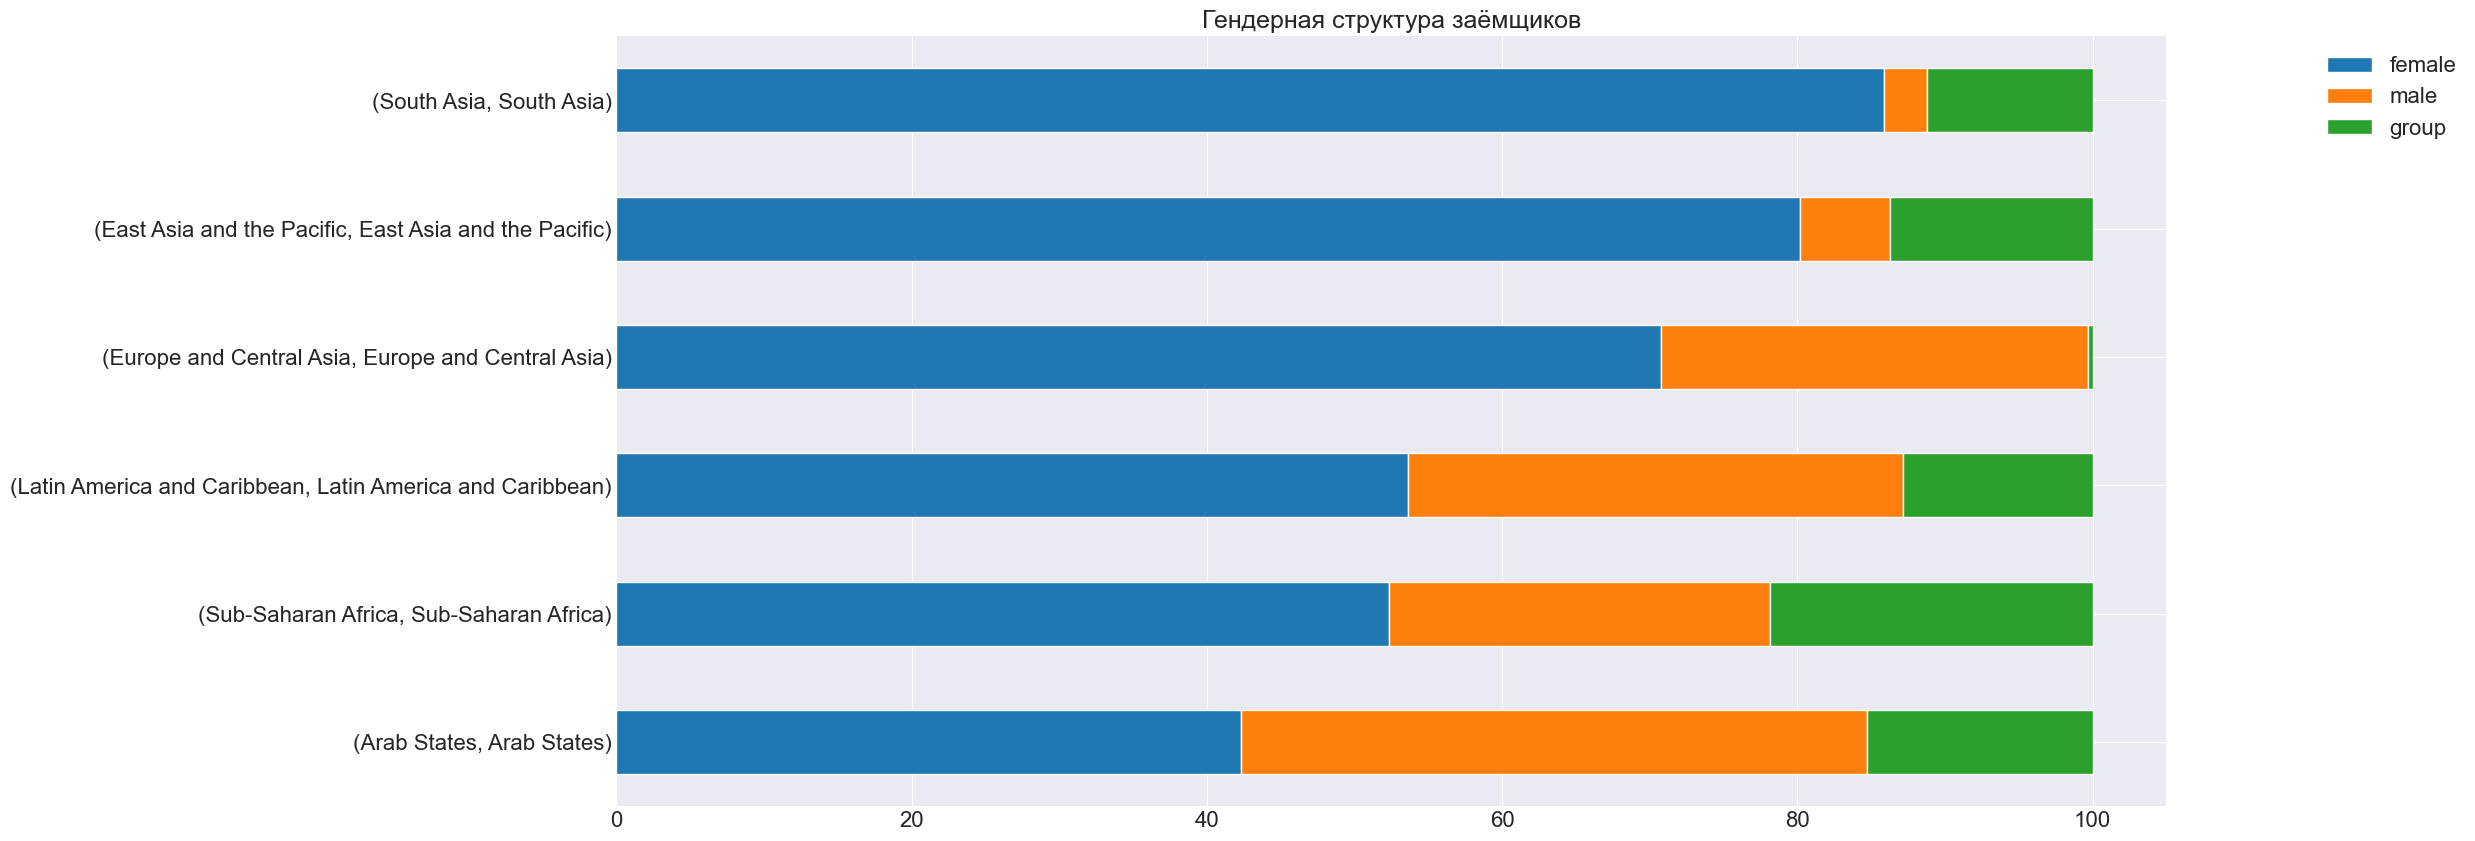

In [7]:
plot = df_gender_by_region.plot.barh(figsize=(20,10), fontsize=16, stacked=True, title='Гендерная структура заёмщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2,1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

# Зависимость пола заёмщика от сектора экономики

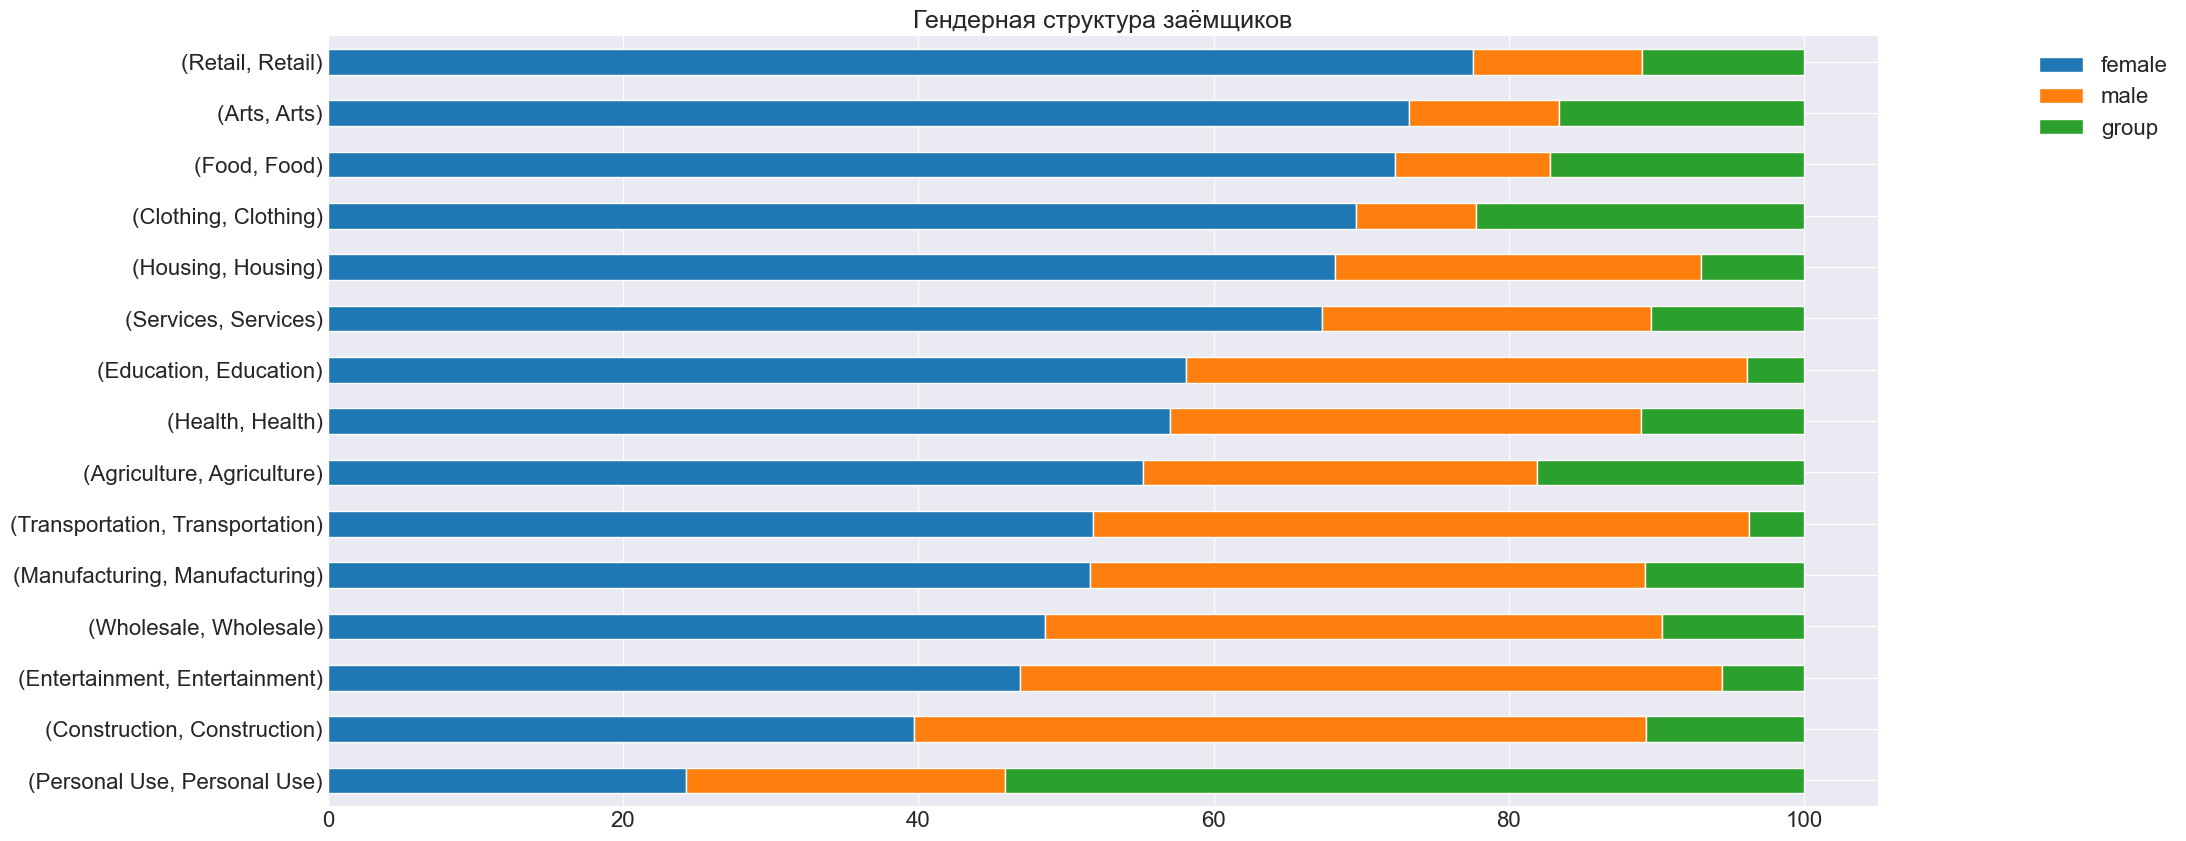

In [8]:
sectors = df_kiva_loans['sector'].value_counts()
countSectorsWithGender = df_kiva_loans[df_kiva_loans['sector'].isin(sectors.index.values)].groupby(['sector', 'borrower_genders'])['borrower_genders'].count()
df_gender_by_sector = countSectorsWithGender.groupby(level=0).apply(lambda x: 100*x/x.sum()).unstack('borrower_genders').fillna(0).sort_values(by=['female', 'male'])[-20:]
df_gender_by_sector = df_gender_by_sector[['female', 'male', 'group']]
plot = df_gender_by_sector.plot.barh(figsize=(20,10), fontsize=16, stacked=True, title='Гендерная структура заёмщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2,1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

# Влияние такого атрибута займа, как Количество кредиторов (lender_count), на суммы и сроки займов

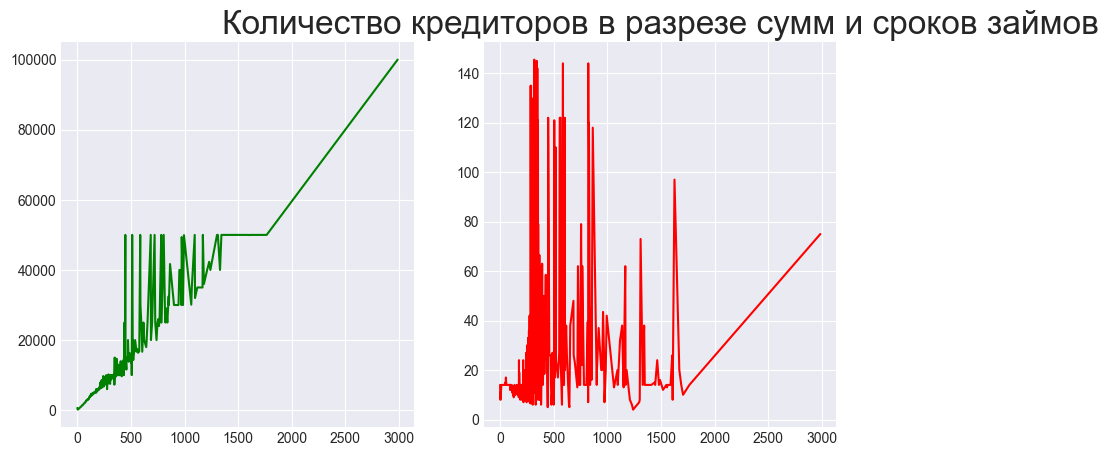

In [19]:
df_sorted_by_lender_count = df_kiva_loans.groupby('lender_count')['loan_amount'].median().fillna(0).reset_index()
df_terms_by_lender_count = df_kiva_loans.groupby('lender_count')['term_in_months'].median().fillna(0).reset_index()
# df_sorted_by_lender_count['lender_count']
# print(df_kiva_loans['lender_count'].max())
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.title('Количество кредиторов в разрезе сумм и сроков займов', fontsize=24)
axes[0].plot(df_sorted_by_lender_count['lender_count'], df_sorted_by_lender_count['loan_amount'], 'g-')
axes[1].plot(df_terms_by_lender_count['lender_count'], df_terms_by_lender_count['term_in_months'], 'r-')
# plt.legend()
plt.show()

# Влияние показателя **MPI** (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.

In [10]:
df_country_median = df_kiva_loans.groupby(['world_region', 'country']).agg({'loan_amount': 'median', 'MPI' : 'median', 'term_in_months' : 'median'}).reset_index()

df_country_median = df_country_median[df_country_median.country.isin(list_countries)].sort_values(by='MPI')
df_country_median

,world_region,country,loan_amount,MPI,term_in_months
35,South Asia,India,325.0,0.000000,43.0
15,Europe and Central Asia,Armenia,1475.0,0.000000,26.0
17,Europe and Central Asia,Kyrgyzstan,1100.0,0.000000,14.0
29,Latin America and Caribbean,Mexico,900.0,0.000000,11.0
2,Arab States,Jordan,1025.0,0.006333,18.0
24,Latin America and Caribbean,Ecuador,1000.0,0.018250,12.0
22,Latin America and Caribbean,Colombia,525.0,0.025125,15.0
25,Latin America and Caribbean,El Salvador,550.0,0.031500,14.0
18,Europe and Central Asia,Tajikistan,650.0,0.046600,14.0
31,Latin America and Caribbean,Peru,900.0,0.053080,8.0


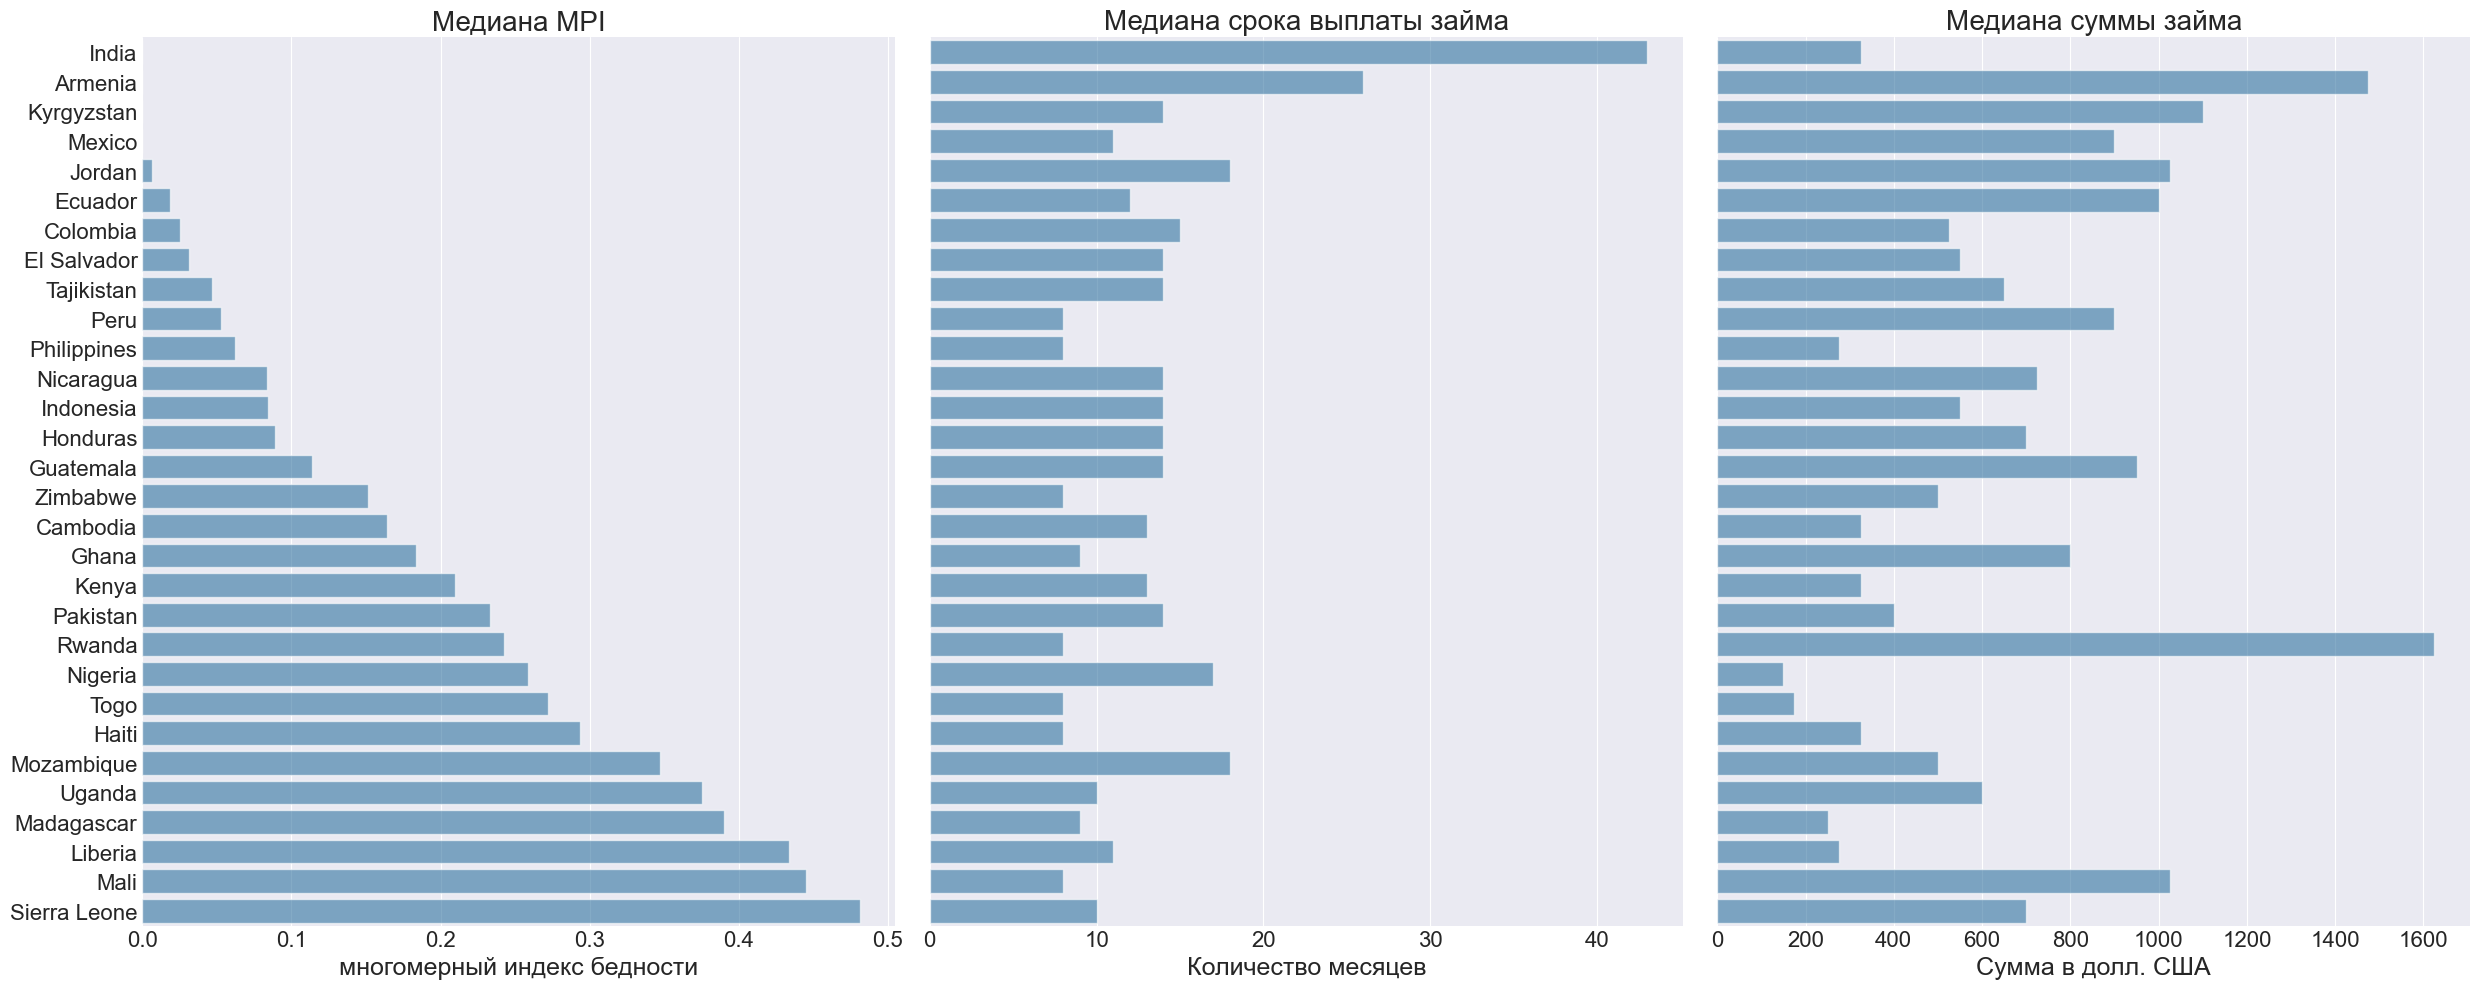

In [11]:
f,ax=plt.subplots(1, 3, sharey=True, figsize=(25,10))

sns.barplot(y='country', x='MPI', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана MPI", fontsize=20)
ax[0].set_xlabel('многомерный индекс бедности', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)
plt.tight_layout()

sns.barplot(y='country', x='term_in_months', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана срока выплаты займа", fontsize=20)
ax[1].set_xlabel('Количество месяцев', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[2])
ax[2].set_title("Медиана суммы займа", fontsize=20)
ax[2].set_xlabel('Сумма в долл. США', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)
plt.show()

# Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе макрорегионов.

In [15]:
n = df_kiva_loans.shape[0]
mid = df_kiva_loans['loan_amount'].mean()
mediana = df_kiva_loans['loan_amount'].median()
# df_kiva_loans['loan_amount_mean_razn'] = df_kiva_loans['loan_amount'] - mid
triSigma = 3 * math.sqrt((sum((df_kiva_loans['loan_amount'] - mid) ** 2)) / (n - 1))
print(triSigma, mediana, mid)

df_kiva_loans_trimmed = df_kiva_loans[(df_kiva_loans['loan_amount'] < (mediana + triSigma)) & (df_kiva_loans['loan_amount'] > (mediana - triSigma))]
df_loans_dates = df_kiva_loans_trimmed.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=False)

dates = ['posted_time', 'disbursed_time']

df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x: x.split('+')[0])
df_loans_dates[dates] = df_loans_dates[dates].apply(pd.to_datetime)

df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['disbursed_time']-df_loans_dates['posted_time']
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['time_funding']/timedelta(days=1)

dev = (df_loans_dates['time_funding']-df_loans_dates['time_funding'].mean()).abs()
std = df_loans_dates['time_funding'].std()
df_loans_dates_trimmed = df_loans_dates[~(dev>3*std) & (df_loans_dates.loc[:,'time_funding']>0)]
df_loans_dates_trimmed

3595.980218648837 500.0 842.3971066961659


C:\Users\Strannik\AppData\Local\Temp\ipykernel_536\4223245242.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x: x.split('+')[0])
C:\Users\Strannik\AppData\Local\Temp\ipykernel_536\4223245242.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x: x.split('+')[0])
C:\Users\Strannik\AppData\Local\Temp\ipykernel_536\4223245242.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI,time_funding
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,...,4.0,6,NaN,female,irregular,2014-01-01,KEN,Sub-Saharan Africa,0.209375,28.650336
67,1080150,125.0,125.0,Energy,Services,purchase solar lanterns for resale.,KE,Kenya,NaN,KES,...,3.0,6,NaN,male,irregular,2014-01-02,KEN,Sub-Saharan Africa,0.209375,27.703970
114,1080151,125.0,125.0,Energy,Services,buy solar lanterns for sale.,KE,Kenya,NaN,KES,...,3.0,7,NaN,female,irregular,2014-01-02,KEN,Sub-Saharan Africa,0.209375,27.624109
195,1080149,125.0,125.0,Grocery Store,Food,ncrease my yams stock for sales,KE,Kenya,NaN,KES,...,3.0,6,NaN,female,irregular,2014-01-02,KEN,Sub-Saharan Africa,0.209375,19.566435
199,653295,2850.0,2850.0,Personal Housing Expenses,Housing,to pay for the construction of a hygienic toil...,VN,Vietnam,Hai Duong,VND,...,14.0,86,"#Elderly, #Low-profit FP, #Post-disbursed",group,bullet,2014-01-02,NaN,NaN,NaN,24.859051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668656,1334144,2000.0,2000.0,Weaving,Arts,to increase the physical space of her workshop...,MX,Mexico,Oaxaca,USD,...,13.0,59,"volunteer_pick, #Repeat Borrower, #Biz Durable...",female,bullet,2017-07-05,MEX,Latin America and Caribbean,0.000000,34.570625
668705,1334000,125.0,125.0,Farming,Agriculture,to purchase improved farm inputs that will inc...,NG,Nigeria,Kaduna,NGN,...,19.0,5,"#Vegan, #Parent, #Schooling",male,bullet,2017-07-05,NGA,Sub-Saharan Africa,0.258811,6.782963
668763,1333718,300.0,300.0,Farming,Agriculture,purchase fertilizers.,UG,Uganda,Ishaka,UGX,...,7.0,8,#Elderly,male,monthly,2017-07-05,UGA,Sub-Saharan Africa,0.375300,9.942708
668921,1334147,1900.0,1900.0,Crafts,Arts,"to purchase raw materials (wool, dyes and fire...",MX,Mexico,Oaxaca,USD,...,13.0,62,"#Repeat Borrower, #Unique, #Fabrics, #Job Crea...",female,bullet,2017-07-05,MEX,Latin America and Caribbean,0.000000,34.568808


In [16]:
df_country_median = df_loans_dates_trimmed.groupby('world_region').agg({'loan_amount': 'median', 'time_funding' : 'median', 'term_in_months' : 'median'}).reset_index()

df_country_median = df_country_median.sort_values(by='term_in_months')
df_country_median['monthly_repayment'] = df_country_median['loan_amount'] / df_country_median['term_in_months']
df_country_median

,world_region,loan_amount,time_funding,term_in_months,monthly_repayment
1,East Asia and the Pacific,575.0,9.960394,10.0,57.500000
3,Latin America and Caribbean,750.0,18.566319,13.0,57.692308
5,Sub-Saharan Africa,300.0,11.618976,13.0,23.076923
0,Arab States,650.0,3.776863,14.0,46.428571
4,South Asia,1087.5,9.744039,21.0,51.785714
2,Europe and Central Asia,1100.0,27.837870,66.0,16.666667


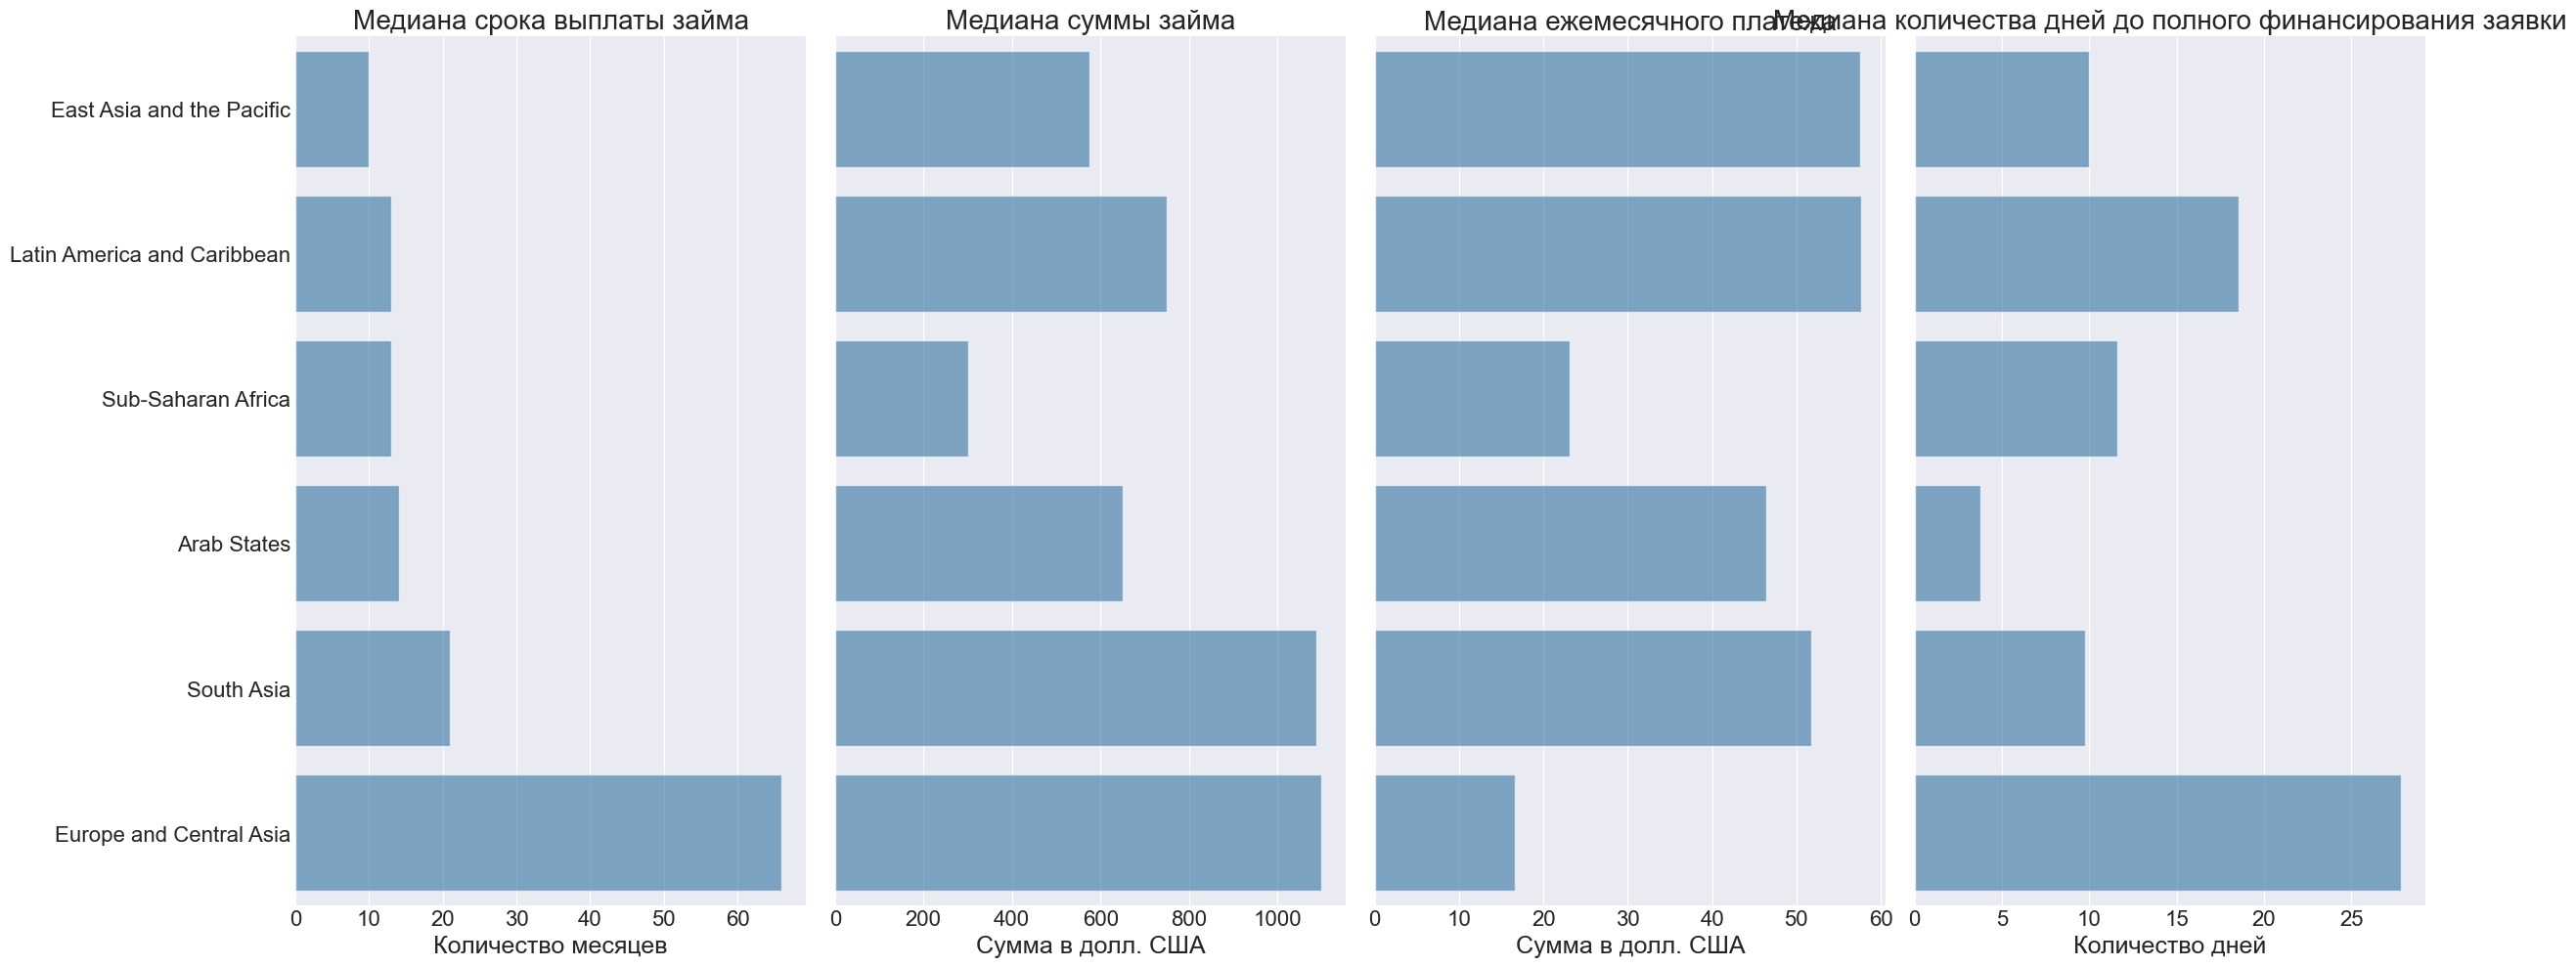

In [17]:
f,ax=plt.subplots(1, 4, sharey=True, figsize=(25,10))

sns.barplot(y='world_region', x='term_in_months', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана срока выплаты займа", fontsize=20)
ax[0].set_xlabel('Количество месяцев', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='world_region', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана суммы займа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y='world_region', x='monthly_repayment', data=df_country_median, alpha=0.6, ax=ax[2])
ax[2].set_title("Медиана ежемесячного платежа", fontsize=20)
ax[2].set_xlabel('Сумма в долл. США', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

sns.barplot(y='world_region', x='time_funding', data=df_country_median, alpha=0.6, ax=ax[3])
ax[3].set_title("Медиана количества дней до полного финансирования заявки", fontsize=20)
ax[3].set_xlabel('Количество дней', fontsize=18)
ax[3].set_ylabel(None)
ax[3].tick_params(labelsize=16)

plt.tight_layout()
plt.show()